# Support Vector Machine, regularization, and hyperparameter optimization


### IRIS datast

## Importing relevant libraries

In [27]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings
# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importing the IRIS dataset

In [2]:
# commenting the relavant library for my own record
# from sklearn.datasets import load_iris
iris_dataset = load_iris()
# creating a dataframe
iris_dataframe = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
# indicating the target column
iris_dataframe['target'] = iris_dataset.target

## Explore the dataset

In [3]:
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Explanation:
    This table has a column called "target" with numbers that stand for different types of flowers. For example, 0 means "setosa," 1 means "versicolor," and 2 means "virginica."


In [4]:
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Explanation:
    This dataset has 5 columns, all columns are numeric, the four independent columns are float type, and the target (dependent) column is integer type. Also this dataset has 150 rows.

In [5]:
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Missing values:

In [33]:
missing_values = iris_dataframe.isnull().sum()
missing_values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [34]:
iris_dataframe.isnull().values.any()

False

#### Result: There is no missing values or null values in dataset. 

#### ouliers:

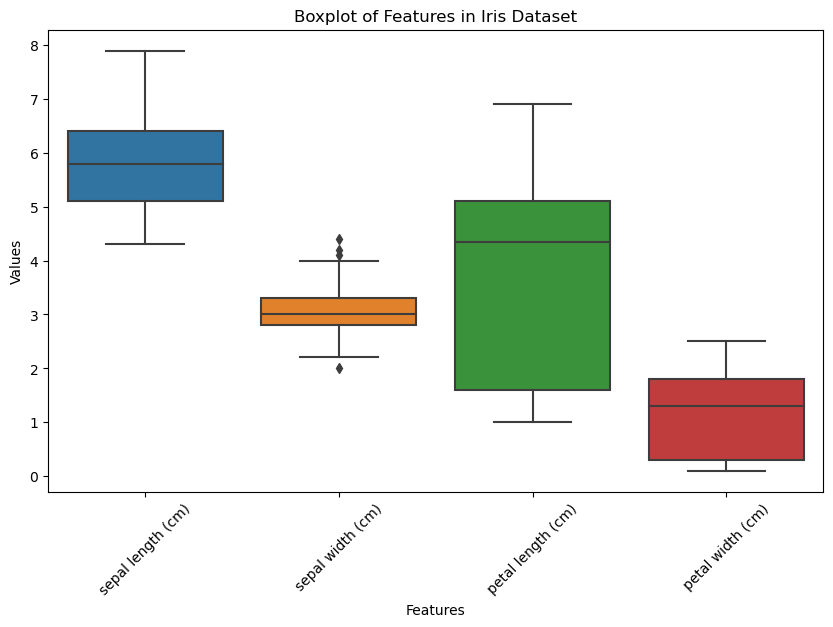

In [28]:
# Visualizing outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_dataframe.drop('target', axis=1))
plt.title('Boxplot of Features in Iris Dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Finding outliers using IQR method
Q1 = iris_dataframe.quantile(0.25)
Q3 = iris_dataframe.quantile(0.75)
IQR = Q3 - Q1

# Define outliers using IQR method
outliers = ((iris_dataframe < (Q1 - 1.5 * IQR)) | (iris_dataframe > (Q3 + 1.5 * IQR))).any(axis=1)

# Display rows with outliers
outliers_data = iris_dataframe[outliers]
print("Rows that contain outliers:")
outliers_data

Rows that contain outliers:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


In [40]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Filtering values based on IQR
        filtered_values = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
        
        # Replacing original DataFrame with filtered values
        df = filtered_values
    
    return df

# List of columns to check for outliers
columns_to_check = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Remove outliers from the specified columns
iris_df = remove_outliers(iris_dataframe, columns_to_check)

print(f"Shape of old dataframe that contained outliers was: {iris_dataframe.shape}")

# Display shape of updated DataFrame without outliers
print(f"Shape of new dataframe without outliers is: {iris_df.shape}")



Shape of old dataframe that contained outliers was: (150, 5)
Shape of new dataframe without outliers is: (146, 5)


#### Reslut: Based on the above box plots and using quantiles we had some outliers that I removed them before further analysis. 

### Explanation:
    With describe() we get the statistics summary of nemeric columns of this dataset, as you can see in above. 

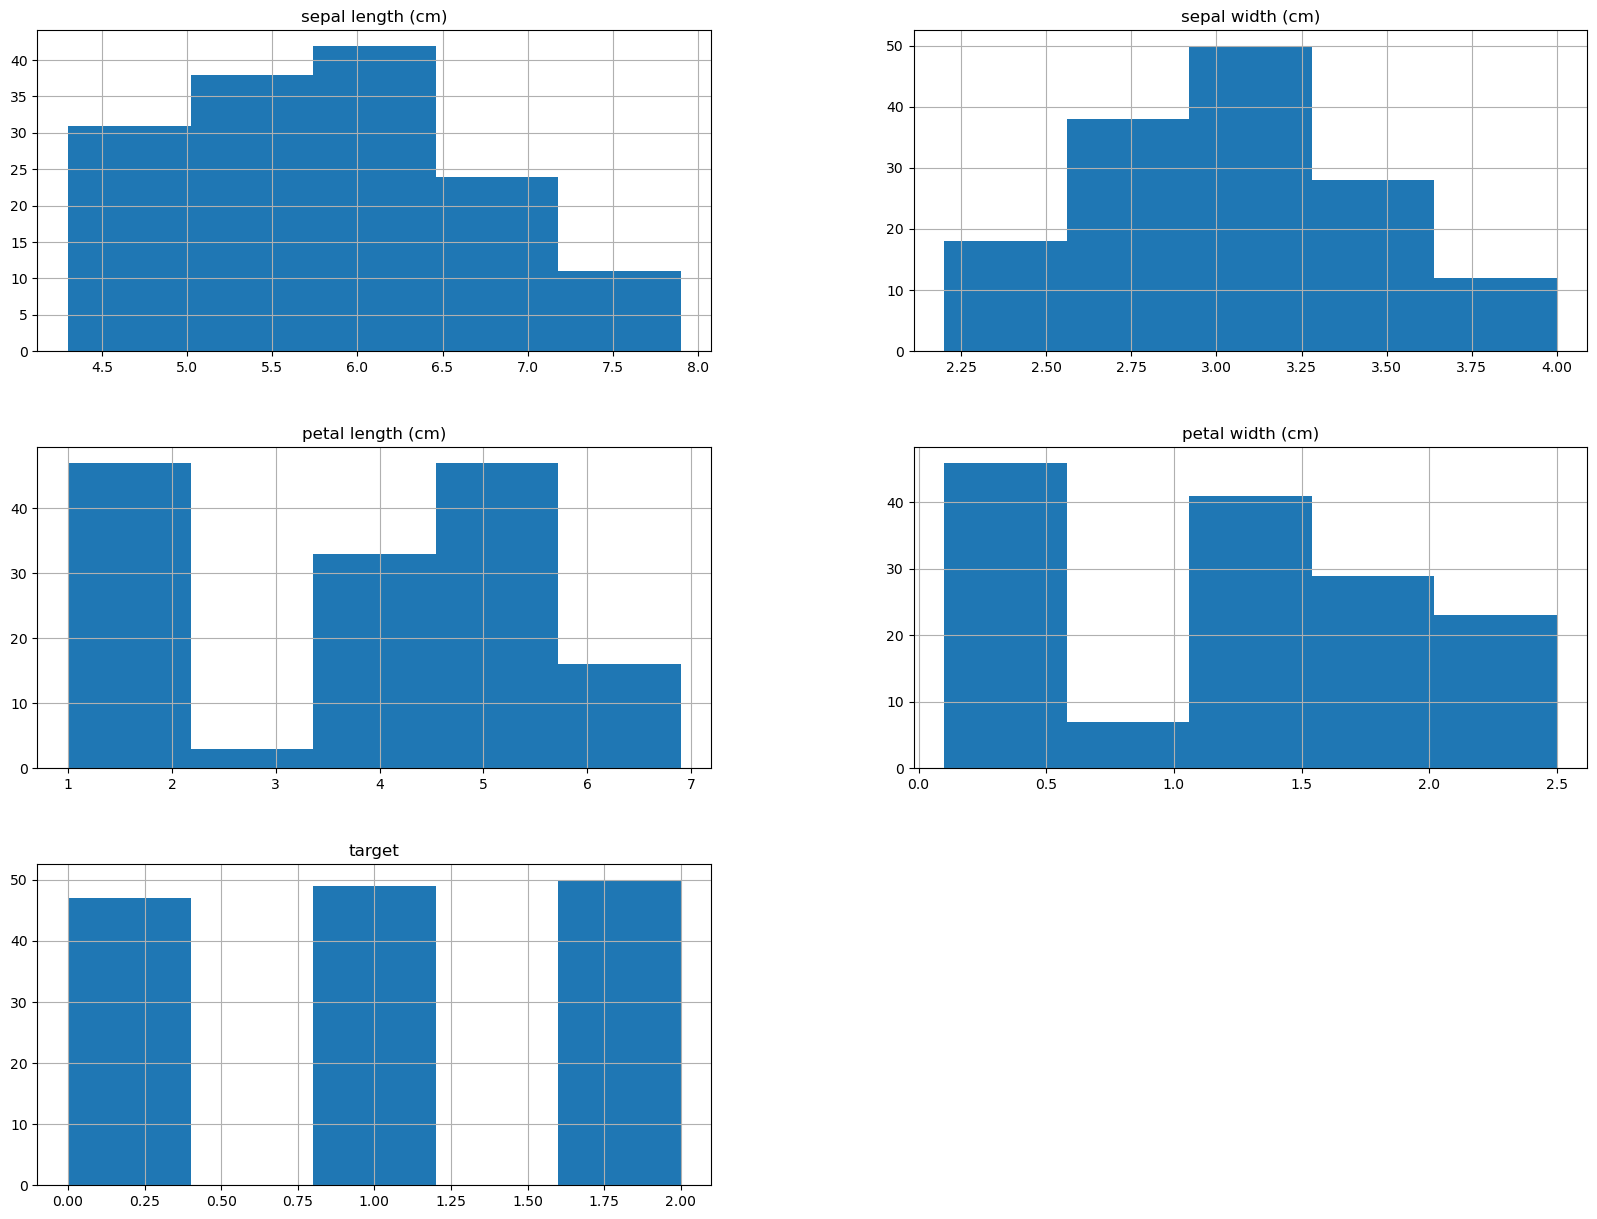

In [45]:
# Plotting histograms for numerical columns
iris_df.hist(bins=5, figsize=(20, 15))
plt.show()

### Explanation:
    Based on above histograms we can see that our target values has a balanced distributions between all different types of flowers. In two columns (sepal length (cm)) and (sepal width (cm)) we have a normal bell-shaped distribution. In two other columns (petal length (cm)) and (petal width (cm)) we see two peaks so this two columns are not normal bell shaped distribution. 

## Train test split

In [47]:
# Separating features and target variable
X = iris_df.drop('target', axis=1)  # features without the target column
y = iris_df['target']  # target column

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Checking the scale of columns in order to use them in SVM.

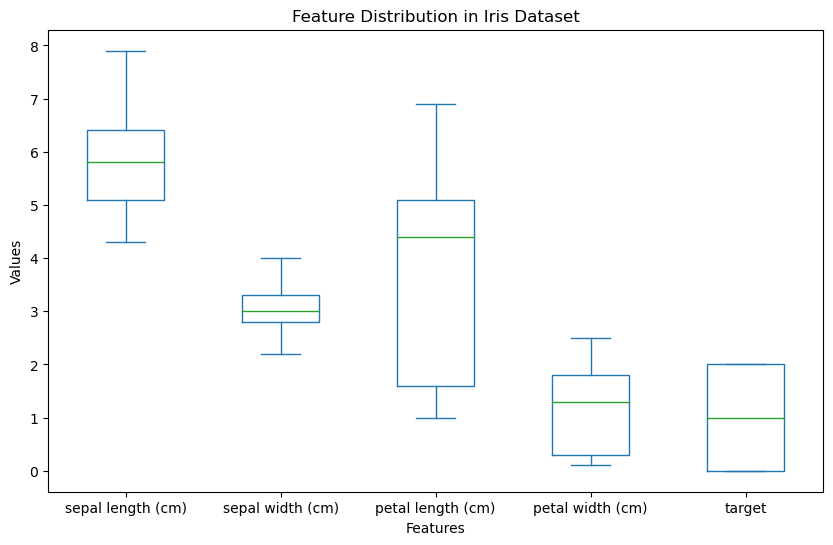

In [50]:
# Visualize feature distributions
iris_df.plot(kind='box', figsize=(10, 6))
plt.title('Feature Distribution in Iris Dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


### Result: because the scale of columns are different it is necessary to use standardization before SVM.

## Standardization

In [52]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Classifier 1 - LinearSVC

In [53]:
# Initialize and train LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

# Predict using LinearSVC
linear_svc_pred = linear_svc.predict(X_test)

# Evaluate LinearSVC
print("Confusion Matrix for LinearSVC:")
print(confusion_matrix(y_test, linear_svc_pred))
linear_svc_accuracy = accuracy_score(y_test, linear_svc_pred)
print("LinearSVC Accuracy:", linear_svc_accuracy)
print("Classification Report:")
print(classification_report(y_test, linear_svc_pred))


Confusion Matrix for LinearSVC:
[[12  0  0]
 [ 0  6  2]
 [ 0  1  9]]
LinearSVC Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.75      0.80         8
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.89      0.88      0.89        30
weighted avg       0.90      0.90      0.90        30



## Classifier 2 - SVC with Linear Kernel

In [54]:
# Initialize and train SVC with linear kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

# Predict using SVC with linear kernel
svc_linear_pred = svc_linear.predict(X_test)

# Evaluate SVC with linear kernel
print("Confusion Matrix for SVC with Linear Kernel:")
print(confusion_matrix(y_test, svc_linear_pred))
svc_linear_accuracy = accuracy_score(y_test, svc_linear_pred)
print("SVC with Linear Kernel Accuracy:", svc_linear_accuracy)
print("Classification Report:")
print(classification_report(y_test, svc_linear_pred))


Confusion Matrix for SVC with Linear Kernel:
[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]
SVC with Linear Kernel Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### Explanation:

    LinearSVC() and SVC(kernel='linear') are both implementations of linear Support Vector Classification (SVC) in scikit-learn, but they differ in their underlying algorithms, capabilities, and computational efficiency.

    - Algorithm Used:
    LinearSVC() uses the linear SVM algorithm with the one-vs-rest (OvR) multiclass reduction by default. It's based on the LIBLINEAR library and uses the linear kernel.
    SVC(kernel='linear') specifies the linear kernel explicitly for the SVC class. It uses the LIBSVM library and also implements linear SVM, but it might use a different underlying algorithm compared to LinearSVC().
    
    - Multiclass Classification:
    LinearSVC() directly supports multiclass classification using the OvR strategy.
    SVC(kernel='linear') by itself is a binary classifier, so for multiclass classification, it uses the one-vs-one (OvO) strategy by default. However, setting the decision_function_shape='ovr' parameter in SVC(kernel='linear') can make it behave similarly to LinearSVC().
    
    - Performance and Scalability:
    LinearSVC() might be more suitable for large datasets due to its use of the LIBLINEAR library, which is known for its efficiency on large-scale problems.
    SVC(kernel='linear') might be computationally more expensive, especially for larger datasets, as it uses LIBSVM, which is generally less efficient for linear problems but might offer more flexibility in terms of kernels.
    
    - Flexibility:
    LinearSVC() has fewer hyperparameters to tune compared to SVC(kernel='linear'). It might be simpler to use and faster to train due to this reduced parameter space.
    SVC(kernel='linear') provides the flexibility to use other kernels as well, not just the linear kernel, allowing you to switch to non-linear kernels like polynomial or RBF if needed.
    
    In summary, while both LinearSVC() and SVC(kernel='linear') perform linear classification, their differences lie in the underlying algorithms, multiclass strategies, computational efficiency, and the flexibility they offer in terms of kernel choices and hyperparameters. The choice between them might depend on the specific requirements of your problem, dataset size, and desired trade-offs between flexibility and computational efficiency. 
    
    1. LinearSVC():
    It's a simpler and faster option for linear classification.
    Great for big datasets because it's efficient.
    Works well for multi-class classification directly.
    
    2. SVC(kernel='linear'):
    Also does linear classification, but might be slower for large datasets.
    Offers more flexibility to use different kernels besides linear.
    Default behavior for multi-class is different, using a strategy that might be less direct.
    
    So, if we want something straightforward and speedy for linear classification, especially with a large dataset or multi-class problem, we go with LinearSVC(). But if we need more flexibility to try different kernels or don't mind slightly slower performance, SVC(kernel='linear') could be a good fit.
    
    Source link: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Classifier 3 - SGDClassifier

In [55]:
# Initialize and train SGDClassifier
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

# Predict using SGDClassifier
sgd_clf_pred = sgd_clf.predict(X_test)

# Evaluate SGDClassifier
print("Confusion Matrix for SGDClassifier:")
print(confusion_matrix(y_test, sgd_clf_pred))
sgd_clf_accuracy = accuracy_score(y_test, sgd_clf_pred)
print("SGDClassifier Accuracy:", sgd_clf_accuracy)
print("Classification Report:")
print(classification_report(y_test, sgd_clf_pred))


Confusion Matrix for SGDClassifier:
[[12  0  0]
 [ 0  8  0]
 [ 0  2  8]]
SGDClassifier Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



## Explanation:
    hinge’: This option gives a linear Support Vector Machine (SVM). It's good for linear classification.

    ‘log_loss’: It provides logistic regression, which is a classifier that predicts probabilities.

    ‘modified_huber’: This is a smooth loss function that's tolerant to outliers and also works with probability estimates.

    ‘squared_hinge’: Similar to hinge, but with a quadratic penalty. It's also used in SVMs.

    ‘perceptron’: This loss function is used in the perceptron algorithm for linear classification.

    The other options (‘squared_error’, ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’) are mainly designed for regression tasks but can sometimes be handy in classification. They're detailed in the SGDRegressor documentation.

    These options represent different ways to measure the error or "cost" of the model's predictions, each with its own characteristics and suitability for various types of problems.
    
    Source link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

## Classifier 4 - SVC with RBF kernel

In [56]:
# Initialize and train SVC with RBF kernel
svc_rbf = SVC(kernel='rbf', random_state=0)
svc_rbf.fit(X_train, y_train)

# Predict using SVC with RBF kernel
svc_rbf_pred = svc_rbf.predict(X_test)

# Evaluate SVC with RBF kernel
print("Confusion Matrix for SVC with RBF kernel:")
print(confusion_matrix(y_test, svc_rbf_pred))
svc_rbf_accuracy = accuracy_score(y_test, svc_rbf_pred)
print("SVC with RBF Kernel Accuracy:", svc_rbf_accuracy)
print("Classification Report:")
print(classification_report(y_test, svc_rbf_pred))


Confusion Matrix for SVC with RBF kernel:
[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
SVC with RBF Kernel Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Classifier 5 - SVC with RandomizedSearchCV for Hyperparameter Optimization

In [57]:
# Set the hyperparameters grid for RandomizedSearchCV
param_dist = {'C': np.logspace(-4, 4, 20),
              'gamma': np.logspace(-4, 4, 20),
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Initialize RandomizedSearchCV
svc_random = RandomizedSearchCV(SVC(random_state=0), param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
svc_random.fit(X_train, y_train)

# Get the best parameters from RandomizedSearchCV
best_params = svc_random.best_params_
print("Best Parameters:", best_params)

# Predict using SVC with best parameters
svc_random_pred = svc_random.predict(X_test)

# Evaluate SVC with best parameters
print("Confusion Matrix for SVC with RandomizedSearchCV:")
print(confusion_matrix(y_test, svc_random_pred))
svc_random_accuracy = accuracy_score(y_test, svc_random_pred)
print("SVC with RandomizedSearchCV Accuracy:", svc_random_accuracy)
print("Classification Report:")
print(classification_report(y_test, svc_random_pred))


Best Parameters: {'kernel': 'sigmoid', 'gamma': 0.0001, 'C': 10000.0}
Confusion Matrix for SVC with RandomizedSearchCV:
[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]
SVC with RandomizedSearchCV Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



## Using ROC curve for evaluating the performance of each classifier.


LinearSVC Evaluation with ROC Curve and AUC:


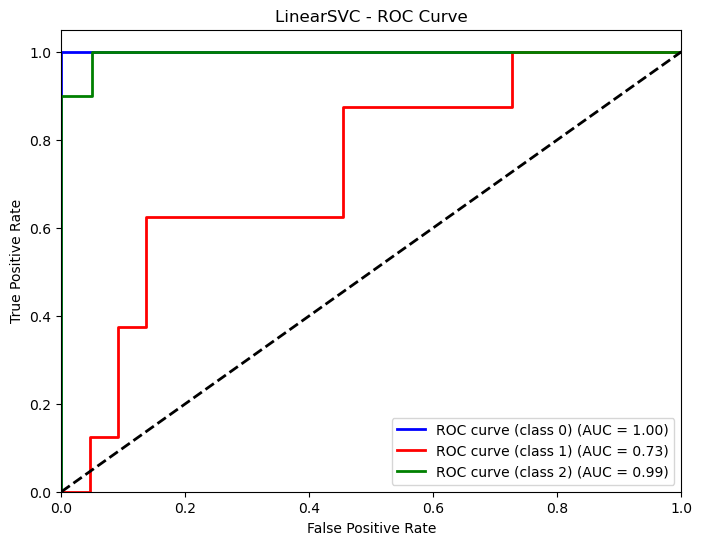


SVC with Linear Kernel Evaluation with ROC Curve and AUC:


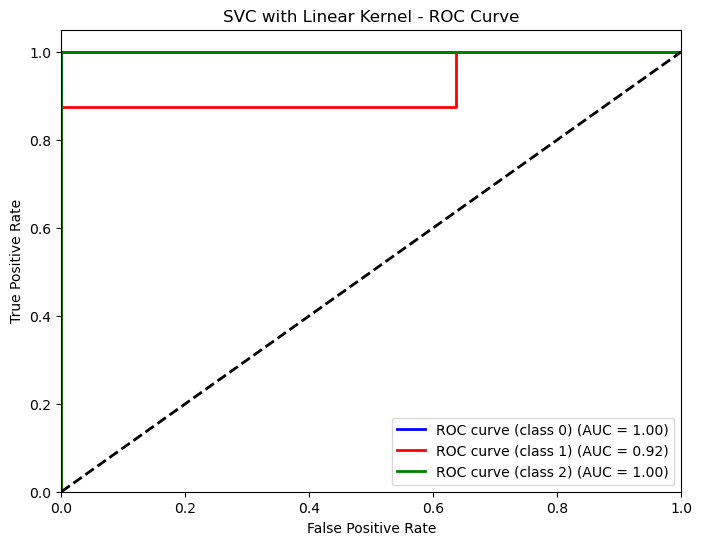


SGDClassifier Evaluation with ROC Curve and AUC:


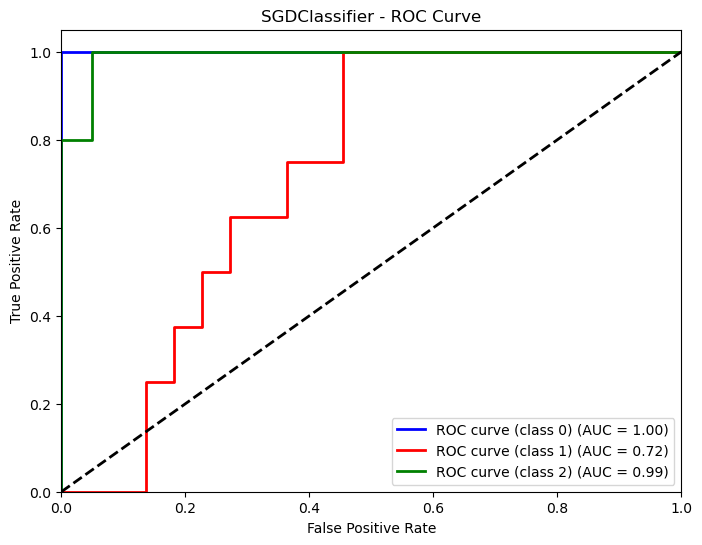


SVC with RBF Kernel Evaluation with ROC Curve and AUC:


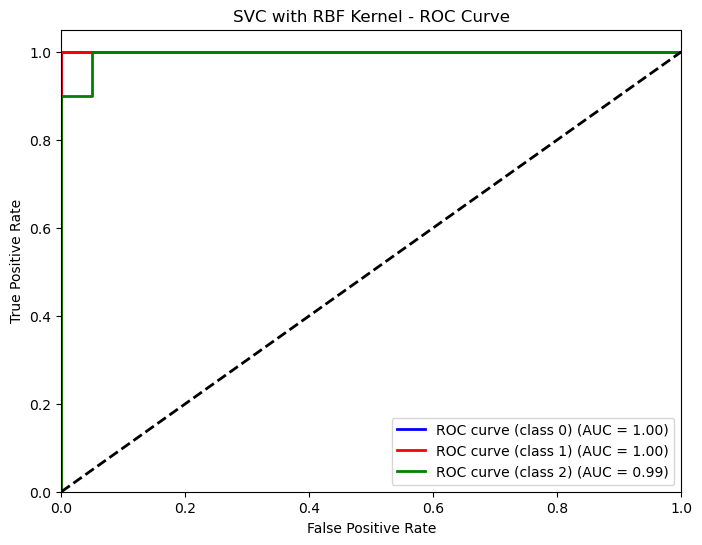


SVC with RandomizedSearchCV Evaluation with ROC Curve and AUC:


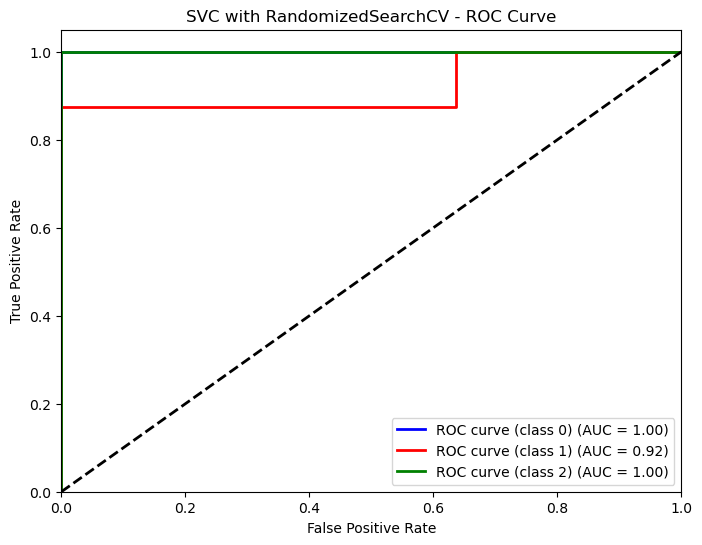

In [58]:
# Function to display ROC curve and calculate AUC for each class
def display_roc_curve(model_name, y_true, y_pred_prob):
    y_true = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = y_true.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# LinearSVC with ROC curve and AUC
linear_svc_prob = linear_svc.decision_function(X_test)
print("\nLinearSVC Evaluation with ROC Curve and AUC:")
display_roc_curve("LinearSVC", y_test, linear_svc_prob)

# SVC with Linear Kernel with ROC curve and AUC
svc_linear_prob = svc_linear.decision_function(X_test)
print("\nSVC with Linear Kernel Evaluation with ROC Curve and AUC:")
display_roc_curve("SVC with Linear Kernel", y_test, svc_linear_prob)

# SGDClassifier with ROC curve and AUC
sgd_clf_prob = sgd_clf.decision_function(X_test)
print("\nSGDClassifier Evaluation with ROC Curve and AUC:")
display_roc_curve("SGDClassifier", y_test, sgd_clf_prob)

# SVC with RBF Kernel with ROC curve and AUC
svc_rbf_prob = svc_rbf.decision_function(X_test)
print("\nSVC with RBF Kernel Evaluation with ROC Curve and AUC:")
display_roc_curve("SVC with RBF Kernel", y_test, svc_rbf_prob)

# SVC with RandomizedSearchCV with ROC curve and AUC
svc_random_prob = svc_random.decision_function(X_test)
print("\nSVC with RandomizedSearchCV Evaluation with ROC Curve and AUC:")
display_roc_curve("SVC with RandomizedSearchCV", y_test, svc_random_prob)


## Result: Comparison and find the best fit for prediction:
Looking at the models that I've evaluated—LinearSVC, SVC with Linear Kernel, SGDClassifier, SVC with RBF Kernel, and SVC with RandomizedSearchCV—the following metrics will be used for comparison:<BR>
**1.Accuracy:** It measures the overall performance of the model.<BR>
**2.Precision, Recall, F1-Score:** These metrics are important when considering imbalanced classes, showing how well the model is performing for each class.<BR>
**3.ROC Curve and AUC:** It's crucial for assessing the model's ability to distinguish between classes. AUC provides an aggregate measure of performance across all classification thresholds.<BR><BR>
Based on the the results and evaluation metrics:<BR>
•**LinearSVC:** Achieves an accuracy of 0.90, with AUC values varying across classes: class 0 AUC is equal to 1.00; Class 1 AUC is equal to 0.73; class 2 AUC is equal to 0.99.<BR>
•**SVC with Linear Kernel:** Performs slightly better with an accuracy of 0.97, demonstrating higher AUC values for all classes: Class 0 AUC is equal to 1.00; Class 1 AUC is equal to 0.92; class 2 AUC is equal to 1.00.<BR>
•**SGDClassifier:** Shows an accuracy of 0.93, with AUC values similar to LinearSVC: class 0 AUC is equal to 1.00 ; Class 1 AUC is equal to 0.72 ; class 2 AUC is equal to 0.99.<BR>
•**SVC with RBF Kernel:** Also achieves an accuracy of 0.97, with strong AUC values for most classes: class 0 AUC is equal to 1.00 ; Class 1 AUC is equal to 1.00; class 2 AUC is equal to 0.99.<BR>
•**SVC with RandomizedSearchCV:** Yields an accuracy of 0.97, with competitive AUC values across classes: Class 0 AUC is equal to 1.00 ; Class 1 AUC is equal to 0.92 ; class 2 AUC is equal to 1.00.<BR>
### Based on these metrics, SVC with Linear Kernel and SVC with RBF Kernel seem to perform slightly better overall, with higher accuracy and good AUC scores across classes. Now, for the prediction, the best fit model was SVC with RBF Kernel and also it has a strong ability to handling nonlinear relationships as well. 


In [64]:
predictions_test = svc_rbf.predict(X_test)

print(predictions_test)

[0 2 0 0 0 2 0 1 1 0 0 1 2 1 2 0 1 2 0 1 2 2 0 1 0 1 1 2 2 0]
